In [12]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [13]:
# read the data
data = pd.read_pickle("data.pkl")
# extract dataset
samples = data["samples"]
hf_samples = samples["hf"]
lf_samples = samples["lf"]
hf_responses = data["responses_lf1"]["hf"]
responses_lf1 = data["responses_lf1"]
responses_lf2 = data["responses_lf2"]
responses_lf3 = data["responses_lf3"]
test_samples = data["test_samples"]
test_hf_responses_noiseless = data["test_hf_responses_noiseless"]
test_hf_responses = data["test_hf_responses"]
test_lf1_responses = data["test_lf1_responses"]
test_lf2_responses = data["test_lf2_responses"]
test_lf3_responses = data["test_lf3_responses"]
# normalize the responses
hf_responses_mean = hf_responses.mean().numpy()
hf_responses_std = hf_responses.std().numpy()
hf_responses_scaled = (hf_responses.clone() -
                       hf_responses_mean) / hf_responses_std

In [14]:
# load the trained models
with open("mfdnnbnn_lf1_order_1_50_50.pkl", "rb") as f:
    model_lf1_order1_50 = torch.load(f)
with open("mfdnnbnn_lf1_order_2_50_50.pkl", "rb") as f:
    model_lf1_order2_50 = torch.load(f)
with open("mfdnnbnn_lf2_order_1_50_50_diff.pkl", "rb") as f:
    model_lf2_order1_50 = torch.load(f)
with open("mfdnnbnn_lf3_order_1_50_50_diff.pkl", "rb") as f:
    model_lf3_order1_50 = torch.load(f)

with open("mfdnnbnn_lf1_order_1_512_512_diff.pkl", "rb") as f:
    model_lf1_order_1_512 = torch.load(f)
with open("mfdnnbnn_lf1_order_2_512_512_diff.pkl", "rb") as f:
    model_lf1_order_2_512 = torch.load(f)
with open("mfdnnbnn_lf2_order_1_512_512_diff.pkl", "rb") as f:
    model_lf2_order_1_512 = torch.load(f)
with open("mfdnnbnn_lf3_order_1_512_512_diff.pkl", "rb") as f:
    model_lf3_order_1_512 = torch.load(f)

In [15]:
# get the predictions
mf_bnn_lf1_order1_50_y, mf_bnn_lf1_order1_50_epistemic, mf_bnn_lf1_order1_50_total_unc, mf_bnn_lf1_order1_50_aleatoric = model_lf1_order1_50.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf1_order1_50_ly = model_lf1_order1_50.predict_lf(test_samples)
# print beta of the model
print(f"beta of the model mf_bnn_lf1_order1_50_y : {model_lf1_order1_50.beta}")

mf_bnn_lf1_order2_50_y, mf_bnn_lf1_order2_50_epistemic, mf_bnn_lf1_order2_50_total_unc, mf_bnn_lf1_order2_50_aleatoric = model_lf1_order2_50.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf1_order2_50_ly = model_lf1_order2_50.predict_lf(test_samples)
# print beta of the model
print(f"beta of the model mf_bnn_lf1_order2_50_y : {model_lf1_order2_50.beta}")

mf_bnn_lf2_order1_50_y, mf_bnn_lf2_order1_50_epistemic, mf_bnn_lf2_order1_50_total_unc, mf_bnn_lf2_order1_50_aleatoric = model_lf2_order1_50.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf2_order1_50_ly = model_lf2_order1_50.predict_lf(test_samples)
# print beta of the model
print(f"beta of the model mf_bnn_lf2_order1_50_y : {model_lf2_order1_50.beta}")

mf_bnn_lf3_order1_50_y, mf_bnn_lf3_order1_50_epistemic, mf_bnn_lf3_order1_50_total_unc, mf_bnn_lf3_order1_50_aleatoric = model_lf3_order1_50.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf3_order1_50_ly = model_lf3_order1_50.predict_lf(test_samples)
# print beta of the model
print(f"beta of the model mf_bnn_lf3_order1_50_y : {model_lf3_order1_50.beta}")

mf_bnn_lf1_order_1_512_y, mf_bnn_lf1_order_1_512_epistemic, mf_bnn_lf1_order_1_512_total_unc, mf_bnn_lf1_order_1_512_aleatoric = model_lf1_order_1_512.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf1_order_1_512_ly = model_lf1_order_1_512.predict_lf(test_samples)
# print beta of the model
print(
    f"beta of the model mf_bnn_lf1_order_1_512_y : {model_lf1_order_1_512.beta}")

mf_bnn_lf1_order_2_512_y, mf_bnn_lf1_order_2_512_epistemic, mf_bnn_lf1_order_2_512_total_unc, mf_bnn_lf1_order_2_512_aleatoric = model_lf1_order_2_512.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf1_order_2_512_ly = model_lf1_order_2_512.predict_lf(test_samples)
# print beta of the model
print(
    f"beta of the model mf_bnn_lf1_order_2_512_y : {model_lf1_order_2_512.beta}")

mf_bnn_lf2_order_1_512_y, mf_bnn_lf2_order_1_512_epistemic, mf_bnn_lf2_order_1_512_total_unc, mf_bnn_lf2_order_1_512_aleatoric = model_lf2_order_1_512.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf2_order_1_512_ly = model_lf2_order_1_512.predict_lf(test_samples)
# print beta of the model
print(
    f"beta of the model mf_bnn_lf2_order_1_512_y : {model_lf2_order_1_512.beta}")

mf_bnn_lf3_order_1_512_y, mf_bnn_lf3_order_1_512_epistemic, mf_bnn_lf3_order_1_512_total_unc, mf_bnn_lf3_order_1_512_aleatoric = model_lf3_order_1_512.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf3_order_1_512_ly = model_lf3_order_1_512.predict_lf(test_samples)
# print beta of the model
print(
    f"beta of the model mf_bnn_lf3_order_1_512_y : {model_lf3_order_1_512.beta}")

beta of the model mf_bnn_lf1_order1_50_y : [-0.45250152 -0.13184112]
beta of the model mf_bnn_lf1_order2_50_y : [ 0.01723253 -0.13797019 -0.91014045]
beta of the model mf_bnn_lf2_order1_50_y : [0.45113574 0.85205544]
beta of the model mf_bnn_lf3_order1_50_y : [-0.52330416  0.14815488]
beta of the model mf_bnn_lf1_order_1_512_y : [-0.45233751 -0.13154428]
beta of the model mf_bnn_lf1_order_2_512_y : [ 0.01548978 -0.14048324 -0.9059404 ]
beta of the model mf_bnn_lf2_order_1_512_y : [0.44931883 0.85097446]
beta of the model mf_bnn_lf3_order_1_512_y : [-0.51409876  0.12569637]


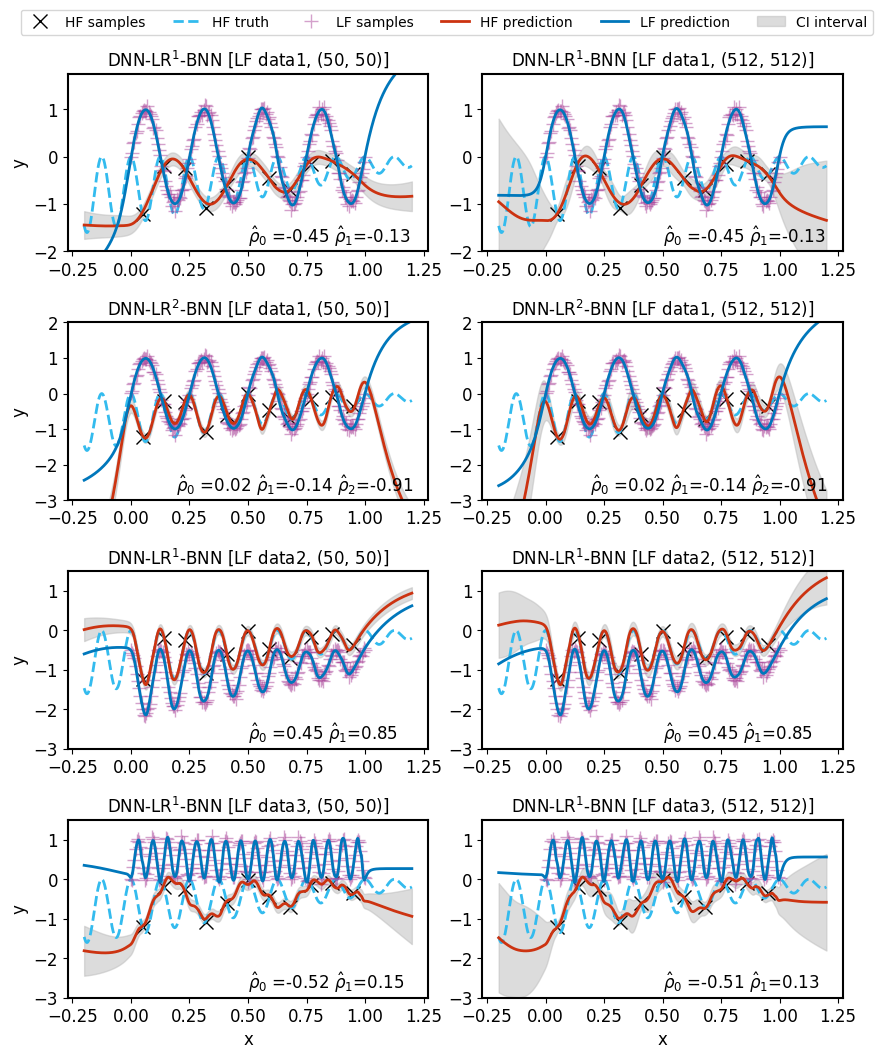

In [45]:
# plot the results into plots with 8 subplots


fig, ax = plt.subplots(4, 2, figsize=(10, 12))
ax[0, 0].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[0, 0].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[0, 0].plot(lf_samples,
              responses_lf1['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[0, 0].plot(test_samples,
              mf_bnn_lf1_order1_50_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[0, 0].plot(test_samples, mf_bnn_lf1_order1_50_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[0, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order1_50_y - 2 *
                       mf_bnn_lf1_order1_50_total_unc).flatten(),
                      (mf_bnn_lf1_order1_50_y + 2 *
                       mf_bnn_lf1_order1_50_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)
ax[0, 0].set_title(r"DNN-LR$^1$-BNN [LF data1, (50, 50)]")
# ax[0, 0].legend()

# plot the second with width 512
ax[0, 1].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[0, 1].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[0, 1].plot(lf_samples,
              responses_lf1['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[0, 1].plot(test_samples,
              mf_bnn_lf1_order_1_512_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[0, 1].plot(test_samples, mf_bnn_lf1_order_1_512_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[0, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order_1_512_y - 2 *
                       mf_bnn_lf1_order_1_512_total_unc).flatten(),
                      (mf_bnn_lf1_order_1_512_y + 2 *
                       mf_bnn_lf1_order_1_512_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)
ax[0, 1].set_title(r"DNN-LR$^1$-BNN [LF data1, (512, 512)]")
# ax[0, 1].legend()

# plot the third with width 50 and order 2
ax[1, 0].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[1, 0].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[1, 0].plot(lf_samples,
              responses_lf1['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[1, 0].plot(test_samples,
              mf_bnn_lf1_order2_50_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[1, 0].plot(test_samples, mf_bnn_lf1_order2_50_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[1, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order2_50_y - 2 *
                       mf_bnn_lf1_order2_50_total_unc).flatten(),
                      (mf_bnn_lf1_order2_50_y + 2 *
                       mf_bnn_lf1_order2_50_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)
ax[1, 0].set_title(r"DNN-LR$^2$-BNN [LF data1, (50, 50)]")
# ax[1, 0].legend()

# plot the fourth with width 512 and order 2
ax[1, 1].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[1, 1].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[1, 1].plot(lf_samples,
              responses_lf1['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[1, 1].plot(test_samples,
              mf_bnn_lf1_order_2_512_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[1, 1].plot(test_samples, mf_bnn_lf1_order_2_512_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[1, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order_2_512_y - 2 *
                       mf_bnn_lf1_order_2_512_total_unc).flatten(),
                      (mf_bnn_lf1_order_2_512_y + 2 *
                       mf_bnn_lf1_order_2_512_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)
ax[1, 1].set_title(r"DNN-LR$^2$-BNN [LF data1, (512, 512)]")
# ax[1, 1].legend()

# plot the fifth with width 50 and order 1
ax[2, 0].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[2, 0].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[2, 0].plot(lf_samples,
              responses_lf2['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[2, 0].plot(test_samples,
              mf_bnn_lf2_order1_50_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[2, 0].plot(test_samples, mf_bnn_lf2_order1_50_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)

# uncertainty  of hf
ax[2, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf2_order1_50_y - 2 *
                       mf_bnn_lf2_order1_50_total_unc).flatten(),
                      (mf_bnn_lf2_order1_50_y + 2 *
                       mf_bnn_lf2_order1_50_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)
ax[2, 0].set_title(r"DNN-LR$^1$-BNN [LF data2, (50, 50)]")
# ax[2, 0].legend()

# plot the sixth with width 512 and order 1
ax[2, 1].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[2, 1].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[2, 1].plot(lf_samples,
              responses_lf2['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[2, 1].plot(test_samples,
              mf_bnn_lf2_order_1_512_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[2, 1].plot(test_samples, mf_bnn_lf2_order_1_512_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)

# uncertainty  of hf
ax[2, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf2_order_1_512_y - 2 *
                       mf_bnn_lf2_order_1_512_total_unc).flatten(),
                      (mf_bnn_lf2_order_1_512_y + 2 *
                       mf_bnn_lf2_order_1_512_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)

ax[2, 1].set_title(r"DNN-LR$^1$-BNN [LF data2, (512, 512)]")
# ax[2, 1].legend()

# plot the seventh with width 50 and order 1
ax[3, 0].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[3, 0].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[3, 0].plot(lf_samples,
              responses_lf3['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[3, 0].plot(test_samples,
              mf_bnn_lf3_order1_50_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[3, 0].plot(test_samples, mf_bnn_lf3_order1_50_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)

# uncertainty  of hf

ax[3, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf3_order1_50_y - 2 *
                       mf_bnn_lf3_order1_50_total_unc).flatten(),
                      (mf_bnn_lf3_order1_50_y + 2 *
                       mf_bnn_lf3_order1_50_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)
ax[3, 0].set_title(r"DNN-LR$^1$-BNN [LF data3, (50, 50)]")
# ax[3, 0].legend()

# plot the eighth with width 512 and order 1
ax[3, 1].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[3, 1].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)

ax[3, 1].plot(lf_samples,
              responses_lf3['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)
ax[3, 1].plot(test_samples,
              mf_bnn_lf3_order_1_512_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)
ax[3, 1].plot(test_samples, mf_bnn_lf3_order_1_512_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)

# uncertainty  of hf
ax[3, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf3_order_1_512_y - 2 *
                       mf_bnn_lf3_order_1_512_total_unc).flatten(),
                      (mf_bnn_lf3_order_1_512_y + 2 *
                       mf_bnn_lf3_order_1_512_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",)
ax[3, 1].set_title(r"DNN-LR$^1$-BNN [LF data3, (512, 512)]")
# ax[3, 1].legend()

# set the axis labels x for the bottom row and y for the left column
for ii in range(4):
    for jj in range(2):
        if ii == 3:
            ax[ii, jj].set_xlabel("x", fontsize=12)
        if jj == 0:
            ax[ii, jj].set_ylabel("y", fontsize=12)
# set the line width of the axes
for ii in range(4):
    for jj in range(2):
        ax[ii, jj].spines["top"].set_linewidth(1.5)
        ax[ii, jj].spines["right"].set_linewidth(1.5)
        ax[ii, jj].spines["left"].set_linewidth(1.5)
        ax[ii, jj].spines["bottom"].set_linewidth(1.5)
        # font size of the axis
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=12)

# set the limit of y for each row

for jj in range(2):
    ax[0, jj].set_ylim([-2, 1.75])
    ax[1, jj].set_ylim([-3, 2])
    ax[2, jj].set_ylim([-3, 1.5])
    ax[3, jj].set_ylim([-3, 1.5])
# set legende for the first subfigure  and put it outside the figure
ax[0, 1].legend(loc='upper left', bbox_to_anchor=(-1.3, 1.4), fontsize=10,
                frameon=True, ncol=7)

# add beta values to the right subfigures
ax[0, 0].text(0.5, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    model_lf1_order1_50.beta[0].item(), model_lf1_order1_50.beta[1].item()),
    fontsize=12,
    transform=ax[0, 0].transAxes)
ax[0, 1].text(0.5, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    model_lf1_order_1_512.beta[0].item(), model_lf1_order_1_512.beta[1].item()),
    fontsize=12,
    transform=ax[0, 1].transAxes)
ax[1, 0].text(0.3, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f} $\hat \rho_2$={:0.2f}" .format(
    model_lf1_order2_50.beta[0].item(), model_lf1_order2_50.beta[1].item(), model_lf1_order2_50.beta[2].item()),
    fontsize=12,
    transform=ax[1, 0].transAxes)
ax[1, 1].text(0.3, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f} $\hat \rho_2$={:0.2f}" .format(
    model_lf1_order_2_512.beta[0].item(), model_lf1_order_2_512.beta[1].item(), model_lf1_order_2_512.beta[2].item()),
    fontsize=12,
    transform=ax[1, 1].transAxes)
ax[2, 0].text(0.5, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    model_lf2_order1_50.beta[0].item(), model_lf2_order1_50.beta[1].item()),
    fontsize=12,
    transform=ax[2, 0].transAxes)
ax[2, 1].text(0.5, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    model_lf2_order_1_512.beta[0].item(), model_lf2_order_1_512.beta[1].item()),
    fontsize=12,
    transform=ax[2, 1].transAxes)
ax[3, 0].text(0.5, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    model_lf3_order1_50.beta[0].item(), model_lf3_order1_50.beta[1].item()),
    fontsize=12,
    transform=ax[3, 0].transAxes)
ax[3, 1].text(0.5, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    model_lf3_order_1_512.beta[0].item(), model_lf3_order_1_512.beta[1].item()),
    fontsize=12,
    transform=ax[3, 1].transAxes)
# space of sub-figures
plt.subplots_adjust(wspace=0.15, hspace=0.4)
# save the figure
plt.savefig("net_influence_dnn_lr_bnn.pdf", bbox_inches="tight", dpi=300)
plt.savefig("net_influence_dnn_lr_bnn.png", bbox_inches="tight", dpi=300)
plt.show()